<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%AC%B4%EC%8A%A8%EC%9D%BC%EC%9D%B4%EC%A1%B0_SNA%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 먼저 읽어주세요!

이번 실습에서 사용한 데이터는 정형화된 데이터가 아니라 제가 어떤 한 사이트에서 죄다 긁어모아온 데이터 입니다.

내용인 즉슨, 외국의 한 해킹사이트가 있는데 거기서 **소비자 게시판, 판매자 게시판**이 있습니다.

그 중 판매자 게시판을 보면 게시글을 올린 사람의 **이름**, 파는 해킹 아이템의 **정보(종류)**,**댓글수, 조회수**등이 있습니다.

그래서 이번 실습에서는 **판매자가 Source Node**, **해킹 아이템의 정보,혹은 종류가 Target Node**, 그리고 댓글수와 조회수는 각각 **Weight**가 될 예정입니다.

즉, 판매자가 예를 들어서 "연세대학교 Learn-us 시스템 해킹 프로그램 팝니다!."라고 글을 올렸다고 가정하면 이 게시글을 클릭한 사람과 댓글을 단 사람 모두 interaction이 발생했다고 간주합니다.

댓글이 아닌 단순 조회한 행위만으로도 상호작용이 발생했다고 보는 이유는 판매자가 게시글을 올릴때의 자신의 메일주소, 혹은 sns아이디 등등을 올려놓기 때문에 굳이 댓글을 달지 않아도 게시글 조회만으로도 연락이 가능하기 때문입니다.

---

## 그럼 왜 이걸 하느냐??

아래 사이트에 들어가보면 다양한 아이템들이 거래되고 있습니다.
넷플릭스 이용권, 게임 아이디 부터 해서 심지어는 크래킹 프로그램까지 거래되고 있습니다. 외국의 경우는 제가 잘은 모르겠으나, 한국에서는 엄연히 합법이 아닌 품목들이 거래되고 있기에 온라인 해킹, 혹은 사이버 범죄 등의 예방 차원에서 외국의 한 해킹(크랙킹)사이트를 벤치마킹하여 어떤 종류의 아이템 들이 주로 거래되는지(Account 인지, Shop인지, Service인지 등등) 그리고 주로 이러한 활발한 영향력을 가진 사람은 누구인지 등을 밝혀내기 위함 이라고 볼 수 있습니다.

홈페이지 링크: https://cracking.org/forums/sellers-section.69/?order=reply_count&direction=desc



# ***RQ랑 팀이름, 학번 이름, 서론, 데이터 설명, 활용목적, node와 edge에 대한 정의 쓰기(help)***
---
# ***Node에 대한 정보***
## Source node - 해킹, 크래킹 판매 아이템 게시글을 올리는 유저 닉네임
## Target node - 판매 유저가 다루는 아이템의 종류(항목)
---
# ***Edge에 대한 정보***
## Edge -> 판매 유저가 올린 게시글에 발생한 상호작용(interaction)

## Edge - Replies( 판매 유저가 올린 게시글에 달린 댓글 수)
## Edge - Views( 판매 유저가 올린 게시글의 조회 수)
## Edge - Ratio( 판매 유저가 올린 게시글의 조회 수 대비 댓글 비율)


In [228]:
import networkx as nt
import matplotlib.pyplot as plt
import numpy as np

# 데이터 전처리

비정형 데이터를 크롤링해왔기 때문에 다듬어줄 필요가 있다.

In [229]:
import pandas as pd
hack=pd.read_csv('./crawling_data.txt', sep=' ')
hack=hack['0']
hack=pd.DataFrame(hack)
hack

,0
0,revolution
1,Shop
2,revolution
3,Replies
4,0
...,...
2191,0
2192,Views
2193,86
2194,Apr


긁어온 데이터로 부터 판매자, 판매아이템의 종류, 댓글수, 조회수 등으로 데이터 프레임을 형성한다.

In [230]:
crack1=pd.DataFrame()
crack2=pd.DataFrame()
crack3=pd.DataFrame()
crack4=pd.DataFrame()
for num in range(0, 2196,9):
  seller=pd.DataFrame([hack['0'].iloc[num]])
  crack1=pd.concat([crack1,seller],axis=0)
for num in range(1, 2196, 9):
  kind=pd.DataFrame([hack['0'].iloc[num]])
  crack2=pd.concat([crack2,kind],axis=0)
for num in range(4, 2196, 9):
  reply=pd.DataFrame([hack['0'].iloc[num]])
  crack3=pd.concat([crack3,reply],axis=0)
for num in range(6, 2196, 9):
  view=pd.DataFrame([hack['0'].iloc[num]])
  crack4=pd.concat([crack4,view],axis=0)

In [231]:
crack=pd.concat([crack1,crack2,crack3,crack4],axis=1)
crack.columns=['Seller','Kind','Replies','Views']
crack=crack.reset_index()
crack=crack.drop(['index'],axis=1)
crack

,Seller,Kind,Replies,Views
0,revolution,Shop,0,774
1,Michigaun,Service,0,787
2,malk2015,Account,82,24K
3,cengo,Account,71,47K
4,Mohamed,Service,48,21K
...,...,...,...,...
239,OmarM,Shop,0,257
240,RaneBot,Shop,0,180
241,mRzENitz,Account,0,82
242,f1kinHacker,Account,0,19


K는 1000이므로 24K, 47K 등을 숫자로 바꾸어 준다.

In [232]:
for val, ind in zip(crack['Views'], crack.index):
  if val[-1] == 'K' and len(val) == 2:
    crack['Views'].loc[ind] = val[0]+'000'
  if val[-1] == 'K' and len(val) == 3:
    crack['Views'].loc[ind] = val[:2]+'000'
crack

,Seller,Kind,Replies,Views
0,revolution,Shop,0,774
1,Michigaun,Service,0,787
2,malk2015,Account,82,24000
3,cengo,Account,71,47000
4,Mohamed,Service,48,21000
...,...,...,...,...
239,OmarM,Shop,0,257
240,RaneBot,Shop,0,180
241,mRzENitz,Account,0,82
242,f1kinHacker,Account,0,19


K가 남아있는지 확인

In [233]:
for val in crack['Views']:
  if val[-1] == 'K':
    print(val)

Views 값들을 정수화 시켜준다

In [234]:
crack['Views']=crack['Views'].astype('int')
crack['Replies']=crack['Replies'].astype('int')
crack

,Seller,Kind,Replies,Views
0,revolution,Shop,0,774
1,Michigaun,Service,0,787
2,malk2015,Account,82,24000
3,cengo,Account,71,47000
4,Mohamed,Service,48,21000
...,...,...,...,...
239,OmarM,Shop,0,257
240,RaneBot,Shop,0,180
241,mRzENitz,Account,0,82
242,f1kinHacker,Account,0,19


# 파생변수 생성

Weight를 댓글수(Replies), 조회수(Views)로 나누어 진행하려 했었지만, Replies의 경우 0 값이 더러 존재하기 때문에 Ratio(조회 대비 댓글수)라는 파생변수를 하나 생성해준다. 물론, Replies에 0 값이 있기 때문에 1 을 더한후 조회수로 나누어 준다.

즉, 세 가지 weight로 나누어서 본 연구를 진행해 본다.

In [235]:
crack['Ratio']=(crack['Replies']+1)/crack['Views']
crack

,Seller,Kind,Replies,Views,Ratio
0,revolution,Shop,0,774,0.001292
1,Michigaun,Service,0,787,0.001271
2,malk2015,Account,82,24000,0.003458
3,cengo,Account,71,47000,0.001532
4,Mohamed,Service,48,21000,0.002333
...,...,...,...,...,...
239,OmarM,Shop,0,257,0.003891
240,RaneBot,Shop,0,180,0.005556
241,mRzENitz,Account,0,82,0.012195
242,f1kinHacker,Account,0,19,0.052632


결측값 확인

In [236]:
crack.isnull().sum()

Seller     0
Kind       0
Replies    0
Views      0
Ratio      0
dtype: int64

# 중복값 제거

In [237]:
crack=crack.drop_duplicates()
crack

,Seller,Kind,Replies,Views,Ratio
0,revolution,Shop,0,774,0.001292
1,Michigaun,Service,0,787,0.001271
2,malk2015,Account,82,24000,0.003458
3,cengo,Account,71,47000,0.001532
4,Mohamed,Service,48,21000,0.002333
...,...,...,...,...,...
239,OmarM,Shop,0,257,0.003891
240,RaneBot,Shop,0,180,0.005556
241,mRzENitz,Account,0,82,0.012195
242,f1kinHacker,Account,0,19,0.052632


중복값을 제거 했으니 보기 좋게 리인덱싱 한다.

In [238]:
crack=crack.reset_index()
crack=crack.drop(['index'],axis=1)
crack

,Seller,Kind,Replies,Views,Ratio
0,revolution,Shop,0,774,0.001292
1,Michigaun,Service,0,787,0.001271
2,malk2015,Account,82,24000,0.003458
3,cengo,Account,71,47000,0.001532
4,Mohamed,Service,48,21000,0.002333
...,...,...,...,...,...
232,OmarM,Shop,0,257,0.003891
233,RaneBot,Shop,0,180,0.005556
234,mRzENitz,Account,0,82,0.012195
235,f1kinHacker,Account,0,19,0.052632


c_r = weight가 댓글수

c_v = weight가 조회수

c_ra = weight가 Ratio

In [239]:
c_r=crack.drop(['Views','Ratio'],axis=1)
c_v=crack.drop(['Replies','Ratio'],axis=1)
c_ra=crack.drop(['Replies','Views'],axis=1)

# 네트워크 생성

In [240]:
net_reply=nt.from_pandas_edgelist(c_r, source='Seller', target='Kind', edge_attr='Replies')
net_view=nt.from_pandas_edgelist(c_v, source='Seller', target='Kind', edge_attr='Views')
net_ratio=nt.from_pandas_edgelist(c_ra, source='Seller', target='Kind', edge_attr='Ratio')

# 네트워크별(댓글, 조회, 비율) 타입, 노드와 엣지 등을 확인해 본다.

In [241]:
print(nt.info(net_reply))

Name: 
Type: Graph
Number of nodes: 83
Number of edges: 128
Average degree:   3.0843


In [242]:
print(nt.info(net_view))

Name: 
Type: Graph
Number of nodes: 83
Number of edges: 128
Average degree:   3.0843


In [243]:
print(nt.info(net_ratio))

Name: 
Type: Graph
Number of nodes: 83
Number of edges: 128
Average degree:   3.0843


노드 종류

In [244]:
net_reply.nodes

NodeView(('revolution', 'Shop', 'Michigaun', 'Service', 'malk2015', 'Account', 'cengo', 'Mohamed', 'saskura119', 'Combo', 'mashup9988', 'CeaserRodregaz', 'Hampton', 'Med2017', 'Smithybeast1', 'An0nimous', 'Intoxicating', 'VronskyV', 'Other', 'ambi97', 'RedEye', 'F[C]racker', 'Config', 'immmortaleexe', 'buysell143', 'Reactor', 'fyrace', 'cracker92', 'navidhp', 'Green', 'Joel', 'Floord', 'Selling', 'RunnerSeller', 'jamescob7', 'magicovic', 'MaestroTheory', 'JustMe', 'jami671', 'Theblackbeast', 'inferno', 'maxgtr34', 'poilo413', 'marcaswaylin', 'Izzony', 'MrCombo', 'seNs', 'MareYT', 'Gift', 'ahmedhhhh', 'Essa2020', 'Xanny', 'mody17', 'mrkeralone', 'Zer-X', '0xBin', 'w00t1099', 'eBook', 'D1egO', 'slehj', 'Kangaroo69', 'DeamonTrade', 'HIONELES', 'xFox', 'mRzENitz', 'twistedlobby', 'Zebra', 'TheRiddler', 'FloodService', 'axiiiz', '4petesake', 'Rolex69K', 'leXa', 'B0ne', 'OmarM', 'Belgium', 'Dogeism', 'RaneBot', 'Forgiveness', 'ch1p', 'V3nomRest', 'Vulcan', 'f1kinHacker'))

In [245]:
net_view.nodes

NodeView(('revolution', 'Shop', 'Michigaun', 'Service', 'malk2015', 'Account', 'cengo', 'Mohamed', 'saskura119', 'Combo', 'mashup9988', 'CeaserRodregaz', 'Hampton', 'Med2017', 'Smithybeast1', 'An0nimous', 'Intoxicating', 'VronskyV', 'Other', 'ambi97', 'RedEye', 'F[C]racker', 'Config', 'immmortaleexe', 'buysell143', 'Reactor', 'fyrace', 'cracker92', 'navidhp', 'Green', 'Joel', 'Floord', 'Selling', 'RunnerSeller', 'jamescob7', 'magicovic', 'MaestroTheory', 'JustMe', 'jami671', 'Theblackbeast', 'inferno', 'maxgtr34', 'poilo413', 'marcaswaylin', 'Izzony', 'MrCombo', 'seNs', 'MareYT', 'Gift', 'ahmedhhhh', 'Essa2020', 'Xanny', 'mody17', 'mrkeralone', 'Zer-X', '0xBin', 'w00t1099', 'eBook', 'D1egO', 'slehj', 'Kangaroo69', 'DeamonTrade', 'HIONELES', 'xFox', 'mRzENitz', 'twistedlobby', 'Zebra', 'TheRiddler', 'FloodService', 'axiiiz', '4petesake', 'Rolex69K', 'leXa', 'B0ne', 'OmarM', 'Belgium', 'Dogeism', 'RaneBot', 'Forgiveness', 'ch1p', 'V3nomRest', 'Vulcan', 'f1kinHacker'))

In [246]:
net_ratio.nodes

NodeView(('revolution', 'Shop', 'Michigaun', 'Service', 'malk2015', 'Account', 'cengo', 'Mohamed', 'saskura119', 'Combo', 'mashup9988', 'CeaserRodregaz', 'Hampton', 'Med2017', 'Smithybeast1', 'An0nimous', 'Intoxicating', 'VronskyV', 'Other', 'ambi97', 'RedEye', 'F[C]racker', 'Config', 'immmortaleexe', 'buysell143', 'Reactor', 'fyrace', 'cracker92', 'navidhp', 'Green', 'Joel', 'Floord', 'Selling', 'RunnerSeller', 'jamescob7', 'magicovic', 'MaestroTheory', 'JustMe', 'jami671', 'Theblackbeast', 'inferno', 'maxgtr34', 'poilo413', 'marcaswaylin', 'Izzony', 'MrCombo', 'seNs', 'MareYT', 'Gift', 'ahmedhhhh', 'Essa2020', 'Xanny', 'mody17', 'mrkeralone', 'Zer-X', '0xBin', 'w00t1099', 'eBook', 'D1egO', 'slehj', 'Kangaroo69', 'DeamonTrade', 'HIONELES', 'xFox', 'mRzENitz', 'twistedlobby', 'Zebra', 'TheRiddler', 'FloodService', 'axiiiz', '4petesake', 'Rolex69K', 'leXa', 'B0ne', 'OmarM', 'Belgium', 'Dogeism', 'RaneBot', 'Forgiveness', 'ch1p', 'V3nomRest', 'Vulcan', 'f1kinHacker'))

엣지 종류

In [247]:
net_reply.edges

EdgeView([('revolution', 'Shop'), ('Shop', 'CeaserRodregaz'), ('Shop', 'Hampton'), ('Shop', 'Smithybeast1'), ('Shop', 'An0nimous'), ('Shop', 'immmortaleexe'), ('Shop', 'mashup9988'), ('Shop', 'Reactor'), ('Shop', 'fyrace'), ('Shop', 'MaestroTheory'), ('Shop', 'maxgtr34'), ('Shop', 'poilo413'), ('Shop', 'marcaswaylin'), ('Shop', 'JustMe'), ('Shop', 'MrCombo'), ('Shop', 'seNs'), ('Shop', 'ahmedhhhh'), ('Shop', 'Essa2020'), ('Shop', 'mrkeralone'), ('Shop', 'Zer-X'), ('Shop', 'w00t1099'), ('Shop', 'D1egO'), ('Shop', 'slehj'), ('Shop', 'cracker92'), ('Shop', 'DeamonTrade'), ('Shop', 'jamescob7'), ('Shop', 'axiiiz'), ('Shop', 'B0ne'), ('Shop', 'OmarM'), ('Shop', 'leXa'), ('Shop', 'Dogeism'), ('Shop', 'RaneBot'), ('Shop', 'V3nomRest'), ('Michigaun', 'Service'), ('Service', 'Mohamed'), ('Service', 'cengo'), ('Service', 'ambi97'), ('Service', 'F[C]racker'), ('Service', 'navidhp'), ('Service', 'JustMe'), ('Service', 'An0nimous'), ('Service', 'poilo413'), ('Service', 'maxgtr34'), ('Service', 'Ham

In [248]:
net_view.edges

EdgeView([('revolution', 'Shop'), ('Shop', 'CeaserRodregaz'), ('Shop', 'Hampton'), ('Shop', 'Smithybeast1'), ('Shop', 'An0nimous'), ('Shop', 'immmortaleexe'), ('Shop', 'mashup9988'), ('Shop', 'Reactor'), ('Shop', 'fyrace'), ('Shop', 'MaestroTheory'), ('Shop', 'maxgtr34'), ('Shop', 'poilo413'), ('Shop', 'marcaswaylin'), ('Shop', 'JustMe'), ('Shop', 'MrCombo'), ('Shop', 'seNs'), ('Shop', 'ahmedhhhh'), ('Shop', 'Essa2020'), ('Shop', 'mrkeralone'), ('Shop', 'Zer-X'), ('Shop', 'w00t1099'), ('Shop', 'D1egO'), ('Shop', 'slehj'), ('Shop', 'cracker92'), ('Shop', 'DeamonTrade'), ('Shop', 'jamescob7'), ('Shop', 'axiiiz'), ('Shop', 'B0ne'), ('Shop', 'OmarM'), ('Shop', 'leXa'), ('Shop', 'Dogeism'), ('Shop', 'RaneBot'), ('Shop', 'V3nomRest'), ('Michigaun', 'Service'), ('Service', 'Mohamed'), ('Service', 'cengo'), ('Service', 'ambi97'), ('Service', 'F[C]racker'), ('Service', 'navidhp'), ('Service', 'JustMe'), ('Service', 'An0nimous'), ('Service', 'poilo413'), ('Service', 'maxgtr34'), ('Service', 'Ham

In [249]:
net_ratio.edges

EdgeView([('revolution', 'Shop'), ('Shop', 'CeaserRodregaz'), ('Shop', 'Hampton'), ('Shop', 'Smithybeast1'), ('Shop', 'An0nimous'), ('Shop', 'immmortaleexe'), ('Shop', 'mashup9988'), ('Shop', 'Reactor'), ('Shop', 'fyrace'), ('Shop', 'MaestroTheory'), ('Shop', 'maxgtr34'), ('Shop', 'poilo413'), ('Shop', 'marcaswaylin'), ('Shop', 'JustMe'), ('Shop', 'MrCombo'), ('Shop', 'seNs'), ('Shop', 'ahmedhhhh'), ('Shop', 'Essa2020'), ('Shop', 'mrkeralone'), ('Shop', 'Zer-X'), ('Shop', 'w00t1099'), ('Shop', 'D1egO'), ('Shop', 'slehj'), ('Shop', 'cracker92'), ('Shop', 'DeamonTrade'), ('Shop', 'jamescob7'), ('Shop', 'axiiiz'), ('Shop', 'B0ne'), ('Shop', 'OmarM'), ('Shop', 'leXa'), ('Shop', 'Dogeism'), ('Shop', 'RaneBot'), ('Shop', 'V3nomRest'), ('Michigaun', 'Service'), ('Service', 'Mohamed'), ('Service', 'cengo'), ('Service', 'ambi97'), ('Service', 'F[C]racker'), ('Service', 'navidhp'), ('Service', 'JustMe'), ('Service', 'An0nimous'), ('Service', 'poilo413'), ('Service', 'maxgtr34'), ('Service', 'Ham

# 댓글, 조회, 비율 각각의 diameter와 density 확인해 보기(help)
diameter, density 결과 해석(help)

In [250]:
print('diameter')
print(nt.diameter(net_reply))
print('-----------------------')
print('density')
print(nt.density(net_reply))

diameter
7
-----------------------
density
0.037613870114604764


In [251]:
print('diameter')
print(nt.diameter(net_view))
print('-----------------------')
print('density')
print(nt.density(net_view))

diameter
7
-----------------------
density
0.037613870114604764


In [252]:
print('diameter')
print(nt.diameter(net_ratio))
print('-----------------------')
print('density')
print(nt.density(net_ratio))

diameter
7
-----------------------
density
0.037613870114604764


# degree 시각화(help)
해석(help)

(array([75.,  2.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <a list of 10 Patch objects>)

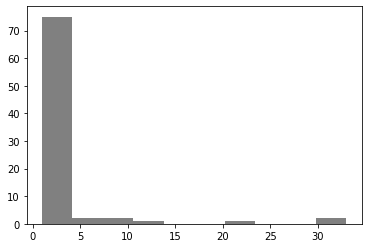

In [253]:
deg=nt.degree(net_view)
plt.hist(dict(deg).values(),color='gray')


# degree 시각화 결과에 log값을 취해준 것

(array([75.,  2.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <a list of 1 Patch objects>)

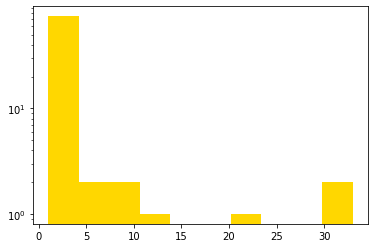

In [254]:
deg=nt.degree(net_ratio)
plt.hist(dict(deg).values(),histtype='stepfilled',log=True,color='gold')

# 네트워크 그림 형성(댓글, 조회, 비율)(help)
그래프 해석(help)

{('Account',
  '4petesake'): Text(-0.027002841732700796, -0.4133862717503156, '0'),
 ('Account',
  'F[C]racker'): Text(-0.10197101193083294, -0.21666802589740952, '2'),
 ('Account',
  'Intoxicating'): Text(0.15029425606089722, -0.44544264972814984, '3'),
 ('Account', 'Izzony'): Text(0.10079299410744919, -0.4691647693910262, '0'),
 ('Account', 'Joel'): Text(-0.011896697089760128, -0.4850928169473832, '1'),
 ('Account',
  'Kangaroo69'): Text(0.21013839064326068, -0.4198659729826018, '0'),
 ('Account', 'Med2017'): Text(0.08099589327247159, -0.5093516992520033, '4'),
 ('Account', 'RedEye'): Text(-0.07852153394150091, -0.1820362479448099, '0'),
 ('Account',
  'RunnerSeller'): Text(-0.04958319248414499, -0.25656210450733524, '0'),
 ('Account',
  'TheRiddler'): Text(0.13903674169351857, -0.4951165735553412, '0'),
 ('Account', 'Vulcan'): Text(0.1148053301352856, -0.32820182600579995, '0'),
 ('Account', 'Zebra'): Text(0.029164796218729135, -0.3276502204263748, '0'),
 ('Account', 'Zer-X'): Text(

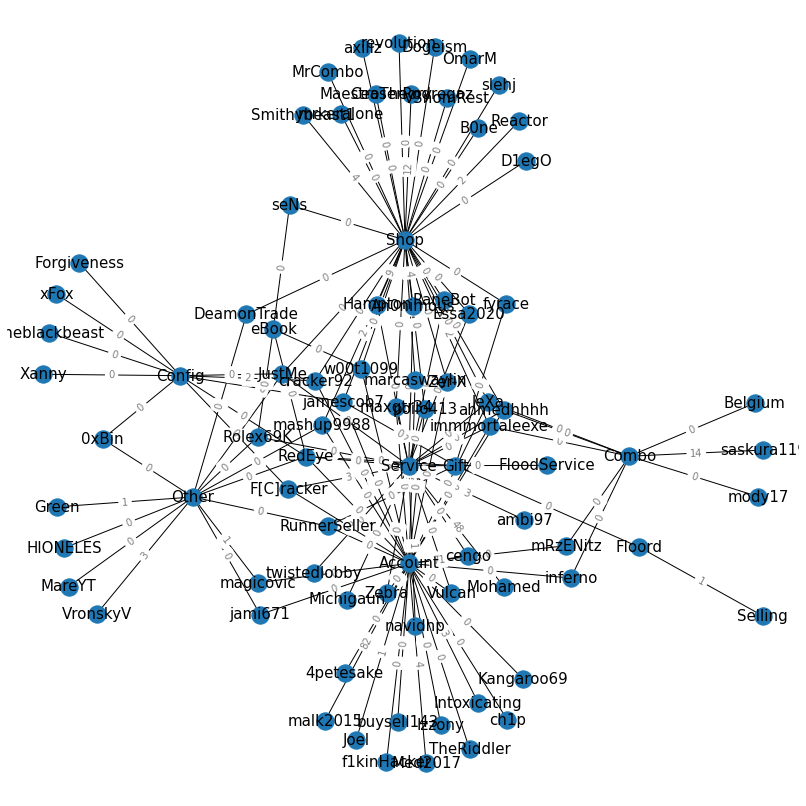

In [255]:
plt.figure(figsize=(11,11))
pos=nt.spring_layout(net_reply)
nt.draw(net_reply, pos, with_labels=True, font_size=15)
edge_weight=nt.get_edge_attributes(net_reply,'Replies')
nt.draw_networkx_edge_labels(net_reply, pos, edge_labels=edge_weight, alpha=0.5)

{}

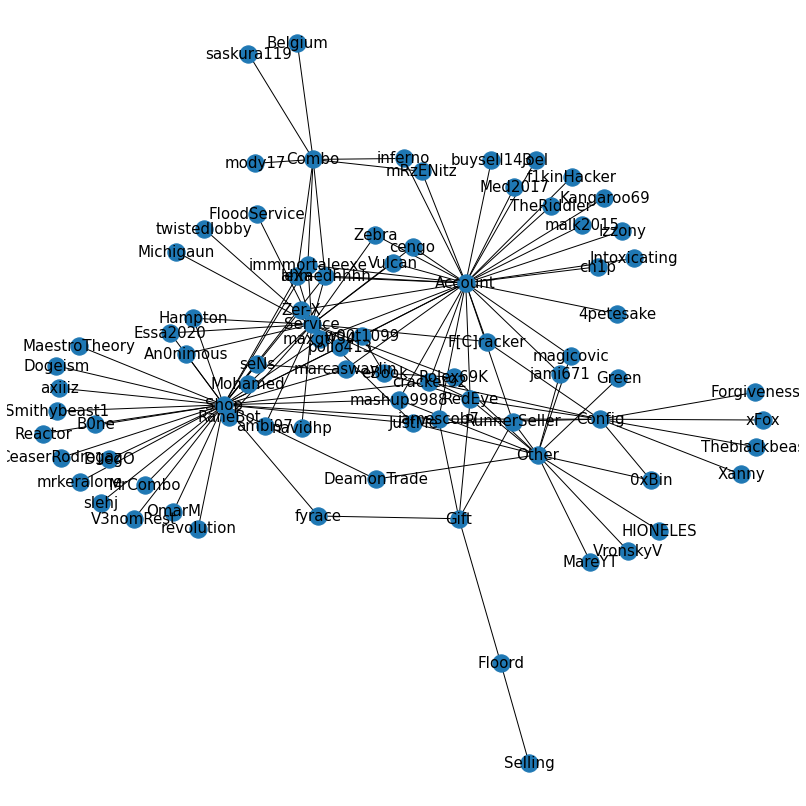

In [256]:
plt.figure(figsize=(11,11))
pos=nt.spring_layout(net_view)
nt.draw(net_view, pos, with_labels=True, font_size=15)
edge_weight=nt.get_edge_attributes(net_view,'View')
nt.draw_networkx_edge_labels(net_view, pos, edge_labels=edge_weight,alpha=0.5)

{('Account',
  '4petesake'): Text(-0.238717485710087, -0.40969652908194265, '0.005649717514124294'),
 ('Account',
  'F[C]racker'): Text(-0.03230654802224106, -0.22757974119801022, '0.0054249547920434'),
 ('Account',
  'Intoxicating'): Text(-0.15948102543330636, -0.4134635625081461, '0.0006666666666666666'),
 ('Account',
  'Izzony'): Text(-0.10956925826118384, -0.4126247956359097, '0.0013227513227513227'),
 ('Account',
  'Joel'): Text(-0.20010927332374356, -0.375962116812142, '0.005405405405405406'),
 ('Account',
  'Kangaroo69'): Text(-0.1634893560803502, -0.465806037873592, '0.00625'),
 ('Account',
  'Med2017'): Text(-0.015113577899638478, -0.41855318778460904, '0.00544069640914037'),
 ('Account',
  'RedEye'): Text(0.031493538803958866, -0.2033493100514253, '0.011627906976744186'),
 ('Account',
  'RunnerSeller'): Text(0.041554612407049406, -0.2865287468666575, '0.0011904761904761906'),
 ('Account',
  'TheRiddler'): Text(-0.11801774526507067, -0.4677875035621375, '0.007142857142857143')

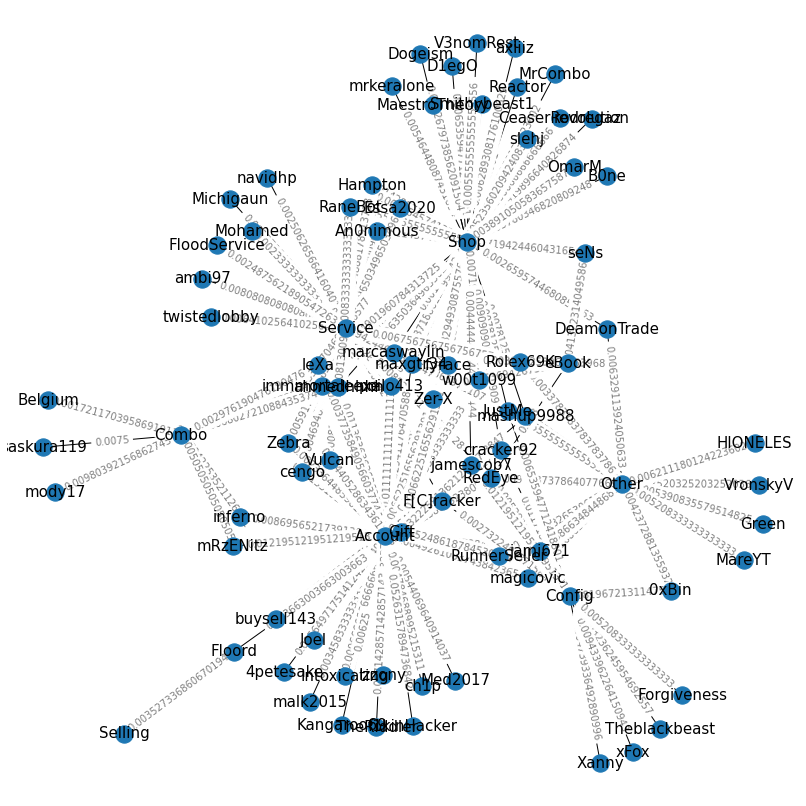

In [257]:
plt.figure(figsize=(11,11))
pos=nt.spring_layout(net_ratio)
nt.draw(net_ratio, pos, with_labels=True, font_size=15)
edge_weight=nt.get_edge_attributes(net_ratio,'Ratio')
nt.draw_networkx_edge_labels(net_ratio, pos, edge_labels=edge_weight,alpha=0.5)

# 3D 버젼으로 그려보기(help)
그래프 해석

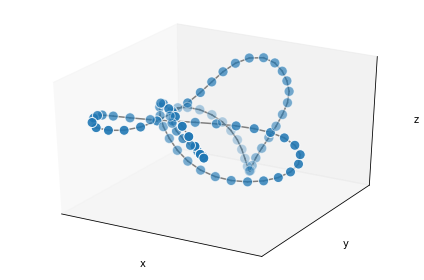

In [258]:
from mpl_toolkits.mplot3d import Axes3D

# The graph to visualize
G = nt.cycle_graph(net_view)

# 3d spring layout
pos = nt.spring_layout(G, dim=3, seed=779)
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()

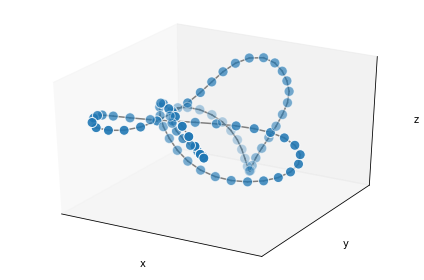

In [259]:
# The graph to visualize
G = nt.cycle_graph(net_reply)

# 3d spring layout
pos = nt.spring_layout(G, dim=3, seed=779)
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()

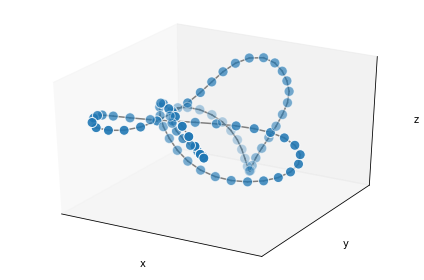

In [260]:
# The graph to visualize
G = nt.cycle_graph(net_ratio)

# 3d spring layout
pos = nt.spring_layout(G, dim=3, seed=779)
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()

# degree, betweenness, closeness, eigenvector의 centrality 구해보기(help)

각각의 중심성에 대한 해석(help)

In [261]:
deg_cen=nt.degree_centrality(net_ratio)
bet_cen=nt.betweenness_centrality(net_ratio)
clo_cen=nt.closeness_centrality(net_ratio)
elg_cen=nt.eigenvector_centrality(net_ratio)

# Degree

In [262]:
print('Degree Centrality')
Degree_Cen=pd.DataFrame(sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:20])
Degree_Cen.columns=['','degree']
Degree_Cen

Degree Centrality


,,degree
0,Shop,0.402439
1,Account,0.390244
2,Service,0.268293
3,Other,0.158537
4,Config,0.121951
5,Combo,0.097561
6,RedEye,0.073171
7,Gift,0.060976
8,immmortaleexe,0.048780
9,jamescob7,0.048780


# Betweenness

In [263]:
print('Betweenness Centrality')
Bet_Cen=pd.DataFrame(sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:20])
Bet_Cen.columns=['Kind','Betweenness']
Bet_Cen

Betweenness Centrality


,Kind,Betweenness
0,Shop,0.432695
1,Account,0.415639
2,Service,0.225750
3,Other,0.131321
4,Config,0.111541
5,RedEye,0.081651
6,Combo,0.077496
7,jamescob7,0.054753
8,Gift,0.054169
9,JustMe,0.051794


# Closeness

In [264]:
print('Closeness Centrality')
Clo_Cen=pd.DataFrame(sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:20])
Clo_Cen.columns=['Kind','Closeness']
Clo_Cen

Closeness Centrality


,Kind,Closeness
0,Shop,0.471264
1,Account,0.465909
2,immmortaleexe,0.438503
3,ahmedhhhh,0.438503
4,leXa,0.438503
5,jamescob7,0.424870
6,RedEye,0.420513
7,maxgtr34,0.420513
8,poilo413,0.420513
9,Service,0.418367


# Eigenvector

In [265]:
print('Eigenvector Centrality')
Eig_Cen=pd.DataFrame(sorted(elg_cen.items(), key=lambda x:x[1], reverse=True)[0:20])
Eig_Cen.columns=['Kind','Eigenvector']
Eig_Cen

Eigenvector Centrality


,Kind,Eigenvector
0,Account,0.431516
1,Shop,0.426609
2,Service,0.303119
3,immmortaleexe,0.170916
4,ahmedhhhh,0.170916
5,leXa,0.170916
6,maxgtr34,0.158050
7,poilo413,0.158050
8,RedEye,0.145553
9,jamescob7,0.138744


# 결과 정리(help)

#Team Review(help)

#References